# Homework 5

## REST API

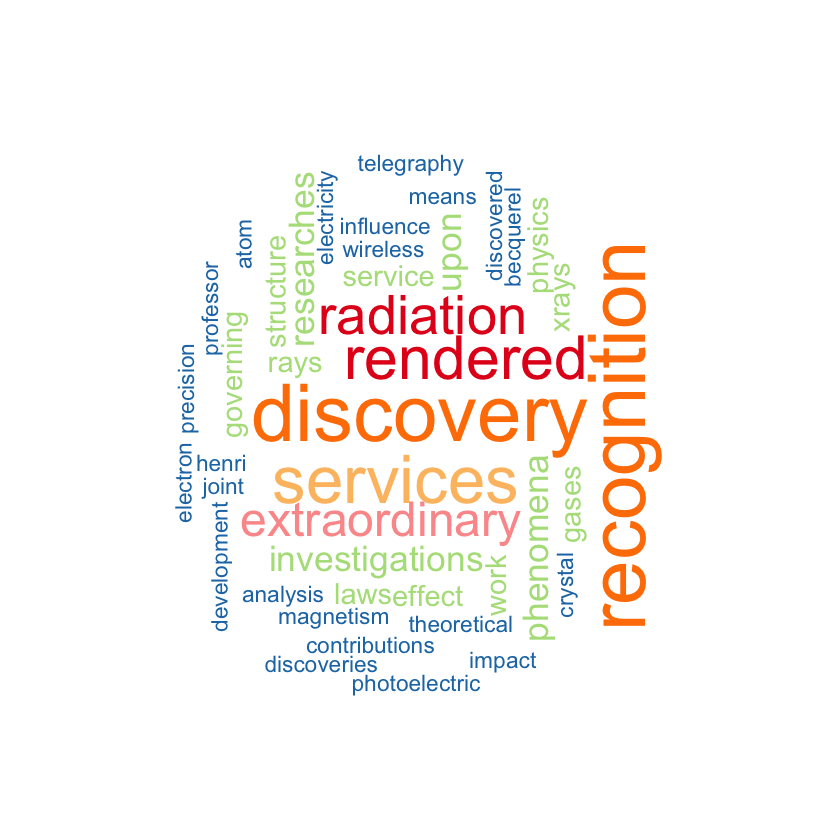

In [167]:
library("httr")
library("jsonlite")

nobel_data <- fromJSON("https://api.nobelprize.org/2.1/nobelPrizes?nobelPrizeCategory=phy")

motivations <- c()    # Empty vector to store motivations

for (laureate in nobel_data$nobelPrizes$laureates) {    #Loop over the laureates
  motivation <- laureate$motivation$en                  #Find the english motivation
  motivations <- c(motivations, motivation)}            #Add motivation to empty vector 

mooncloud <- Corpus(VectorSource(motivations))          #Create corpus
mooncloud <- suppressWarnings(tm_map(mooncloud, stripWhitespace))   #Remove white spaces
mooncloud <- suppressWarnings(tm_map(mooncloud, content_transformer(tolower))) #Make all letters lowercase 
mooncloud <- suppressWarnings(tm_map(mooncloud, removePunctuation))    #Remove commas etc
mooncloud <- suppressWarnings(tm_map(mooncloud, removeWords, stopwords("english"))) #Remove stopwords

wordcloud(mooncloud
        , scale=c(4,0.5)    
        , max.words=100  
        , min.freq = 2
        , random.order=FALSE 
        , rot.per=0.55       
        , use.r.layout=FALSE 
        , colors=brewer.pal(8, "Paired"))

## Web Scraping

In [177]:
library("tidyverse")          
library("rvest")
library("knitr")
library("kableExtra")

scraper_books <- function(a,b){                                        #Scraperfunction for pages a to b 
 
  URL <- "https://books.toscrape.com/"                                                   #Given base URL
  upcs <- vector("character")                                        #Empty vectors for needed variables
  titles_all <- vector("character")
  prices_all <- vector("character")
  ratings_all <- vector("character")
  book_index <- 1                                                               #Start book index at one
  
  for (page_num in a:b) {                                                     #Loop through pages a to b
    if (page_num == 1) {page_url <- URL}                     #For the first page the url is the base url
    else {page_url <- paste0(URL,"catalogue/page-",page_num,".html")}  #For pages 2+ the url is modified
    
    books_html <- read_html(page_url)                                     #Reading the url for each page
    titles <- books_html %>% html_elements(".product_pod h3 a") %>% html_attr("title")   #Extract titles
    prices <- books_html %>% html_elements(".product_pod .price_color") %>% html_text()      #prices and
    ratings <- books_html %>% html_elements(".product_pod p.star-rating") %>% html_attr("class")#ratings
    ratings <- gsub("star-rating ", "", ratings)                   #Leave only number of stars as rating
  
    for (i in 1:length(titles)) {                                  #Loop through every book on each page
      title_url <- gsub(" ", "-", tolower(titles[i]))                       #Change titles to lower case
      title_url <- gsub("[^[:alnum:]-]", "", title_url)                #Remove all non letters in titles
      title_url <- gsub("-+", "-", title_url)                          #No more than one - between words
      book_url <- paste0(URL, "catalogue/", title_url, "_", 1001 - book_index, "/index.html")#Create url
                                                                                    #for every book page
      book_html <- read_html(book_url)                                    #Reading the url for each book
      upcs[i] <- book_html %>% html_elements("table tr:nth-child(1) td") %>% html_text() %>% trimws()
                                                                              #Extract upc for each book
      titles_all[book_index] <- titles[i]                                        #Add titels, prices and
      prices_all[book_index] <- prices[i]                                        #ratings from each page
      ratings_all[book_index] <- ratings[i]                                   #to vectors with all books
      book_index <- book_index + 1}}                                                   #Add one to index 
       
    books_df <- data.frame(                                                     #Creating dataframe from 
    UPC = upcs,                                                                   #extracted information
    Title = titles_all, 
    Price = prices_all,
    Rating = ratings_all,
    stringsAsFactors = FALSE)
   return(books_df)}

scraper_books(1, 3)[1:5,]%>%                                        #Table of first 5 books in dataframe
  kable("html", escape = FALSE) %>%
  kable_styling(full_width = FALSE, position = "left") %>%  
  row_spec(0, background = "lightsteelblue")

<table class="table" style="width: auto !important; ">
 <thead>
  <tr>
   <th style="text-align:left;background-color: lightsteelblue !important;"> UPC </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Title </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Price </th>
   <th style="text-align:left;background-color: lightsteelblue !important;"> Rating </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> b4fd5943413e089a </td>
   <td style="text-align:left;"> A Light in the Attic </td>
   <td style="text-align:left;"> £51.77 </td>
   <td style="text-align:left;"> Three </td>
  </tr>
  <tr>
   <td style="text-align:left;"> c8f7f0cb1abb9cac </td>
   <td style="text-align:left;"> Tipping the Velvet </td>
   <td style="text-align:left;"> £53.74 </td>
   <td style="text-align:left;"> One </td>
  </tr>
  <tr>
   <td style="text-align:left;"> b12b89017878a60d </td>
   <td style="text-align:left;"> Soumission </td>
   <td style="text-align:left;"> £50.10 </td>
   <td style="text-align:left;"> One </td>
  </tr>
  <tr>
   <td style="text-align:left;"> c27f6e1f185b0383 </td>
   <td style="text-align:left;"> Sharp Objects </td>
   <td style="text-align:left;"> £47.82 </td>
   <td style="text-align:left;"> Four </td>
  </tr>
  <tr>
   <td style="text-align:left;"> acddfeab2a407640 </td>
   <td style="text-align:left;"> Sapiens: A Brief History of Humankind </td>
   <td style="text-align:left;"> £54.23 </td>
   <td style="text-align:left;"> Five </td>
  </tr>
</tbody>
</table>